# More Evaluation Metrics

- Precision/Recall Curves
- ROC and AUC
- Multiclass Evaluation

| **Recall Oriented Task** | **Precision Oriented Task** |
| ------------------------  | ---------------------------  |
| Tumor Detection           | Search Engine Results |

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

### Cancer Example

We want to explore a classification problem using breast cancer data.  Here, our goal is to classify a tumor as malignant or not based on measurements of the tumor.  In this example, we want to consider the nature of the classifier examined, and determine how to alter the boundary to better the classifier to our liking.

- Load and examine data
- Compare `LogisticRegression`, `SGDClassifier`, and a `DummyClassifier`
- Examine Precision vs. Recall curve
- Examine ROC Curve
- Shift Decision Boundary and evaluate

In [67]:
cancer = load_breast_cancer()

In [68]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [69]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.dummy import DummyClassifier

In [70]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [72]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [73]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lg_pred = lgr.predict(X_train)
print(confusion_matrix(y_train, lg_pred))
print(classification_report(y_train, lg_pred))

[[141  13]
 [  8 264]]
             precision    recall  f1-score   support

          0       0.95      0.92      0.93       154
          1       0.95      0.97      0.96       272

avg / total       0.95      0.95      0.95       426



In [74]:
from sklearn.model_selection import cross_val_predict

In [75]:
lgr_scores = cross_val_predict(lgr, X_train, y_train, cv = 5, method = 'decision_function')

In [76]:
lgr_scores[:10]

array([  4.32503031, -23.8300296 ,   4.25412499,   8.97972477,
         4.36012861,   4.04074514,   1.8989327 , -11.65534635,
         6.0502121 ,   1.43100233])

### Comparing Precision and Recall

We can visualize the changes that occur accross these metrics together.  To begin, we plot the 



In [77]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

In [78]:
%matplotlib notebook

<IPython.core.display.Javascript object>


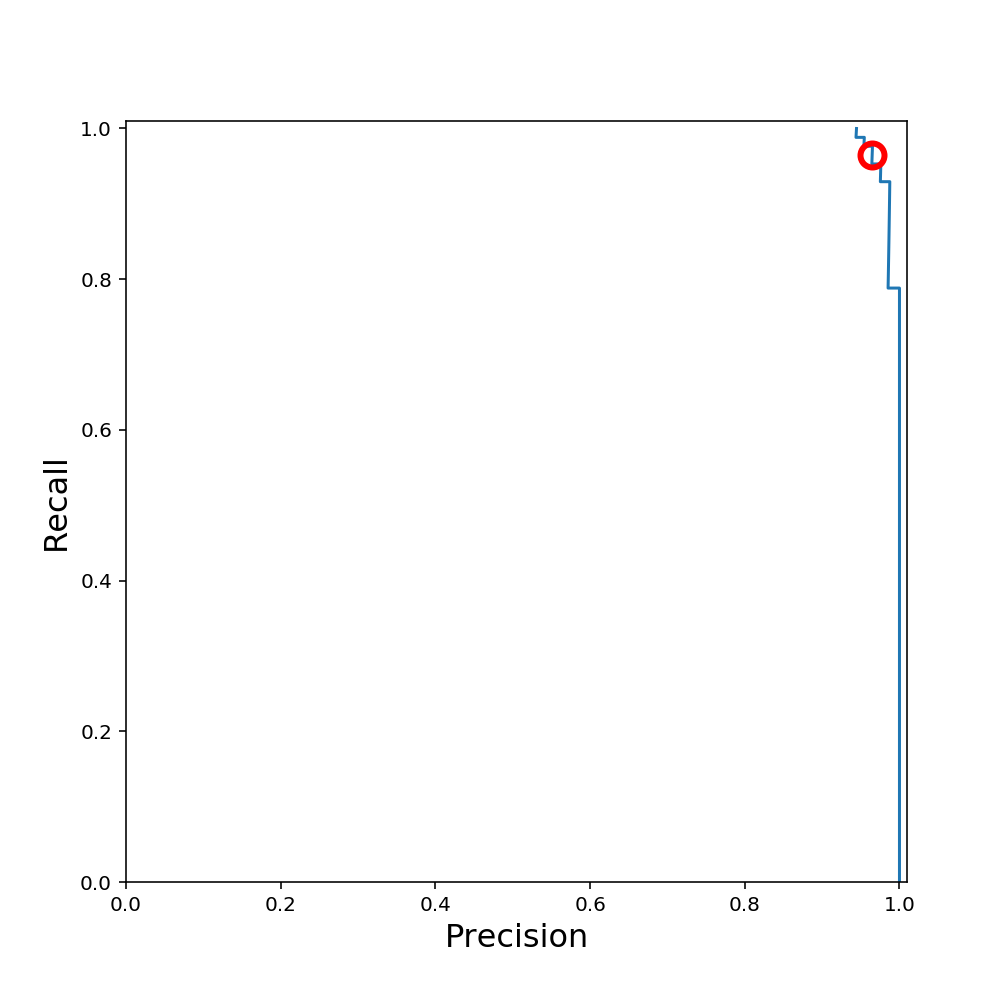

Text(0,0.5,'Recall')

In [79]:
from sklearn.metrics import precision_recall_curve
y_scores_lr = lgr.fit(X_train, y_train).decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize = (7, 7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)

<IPython.core.display.Javascript object>


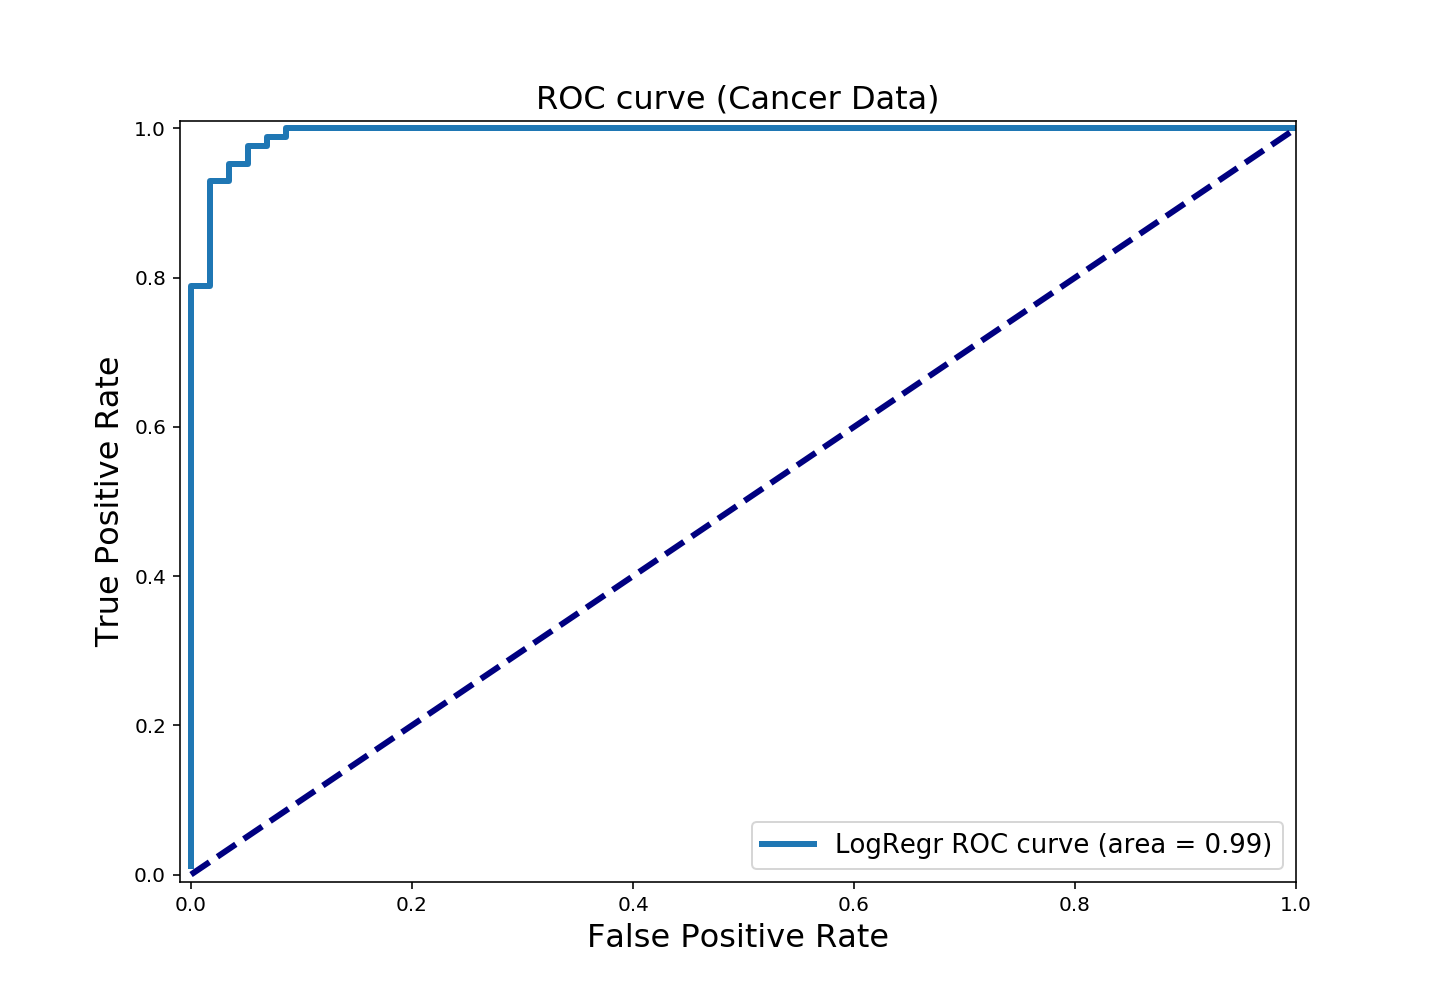

In [80]:
y_score_lr = lgr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize = (10, 7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (Cancer Data)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

### Other Classifiers

In [30]:
sgd = SGDClassifier(max_iter=1000)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_train)
print(confusion_matrix(y_train, sgd_pred))
print(classification_report(y_train, sgd_pred))

[[134  16]
 [ 15 261]]
             precision    recall  f1-score   support

          0       0.90      0.89      0.90       150
          1       0.94      0.95      0.94       276

avg / total       0.93      0.93      0.93       426



In [81]:
dum = DummyClassifier(strategy='most_frequent')
dum.fit(X_train, y_train)
dum_pred = dum.predict(X_train)
print(confusion_matrix(y_train, dum_pred))
print(classification_report(y_train, dum_pred))

[[  0 154]
 [  0 272]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       154
          1       0.64      1.00      0.78       272

avg / total       0.41      0.64      0.50       426



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Digits and Multi-Class Classification

What are the difficult digits to see?

In [82]:
from sklearn.datasets import load_digits
import seaborn as sns
dataset = load_digits()
X, y = dataset.data, dataset.target

In [83]:
lgr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
from sklearn.cross_validation import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

<IPython.core.display.Javascript object>


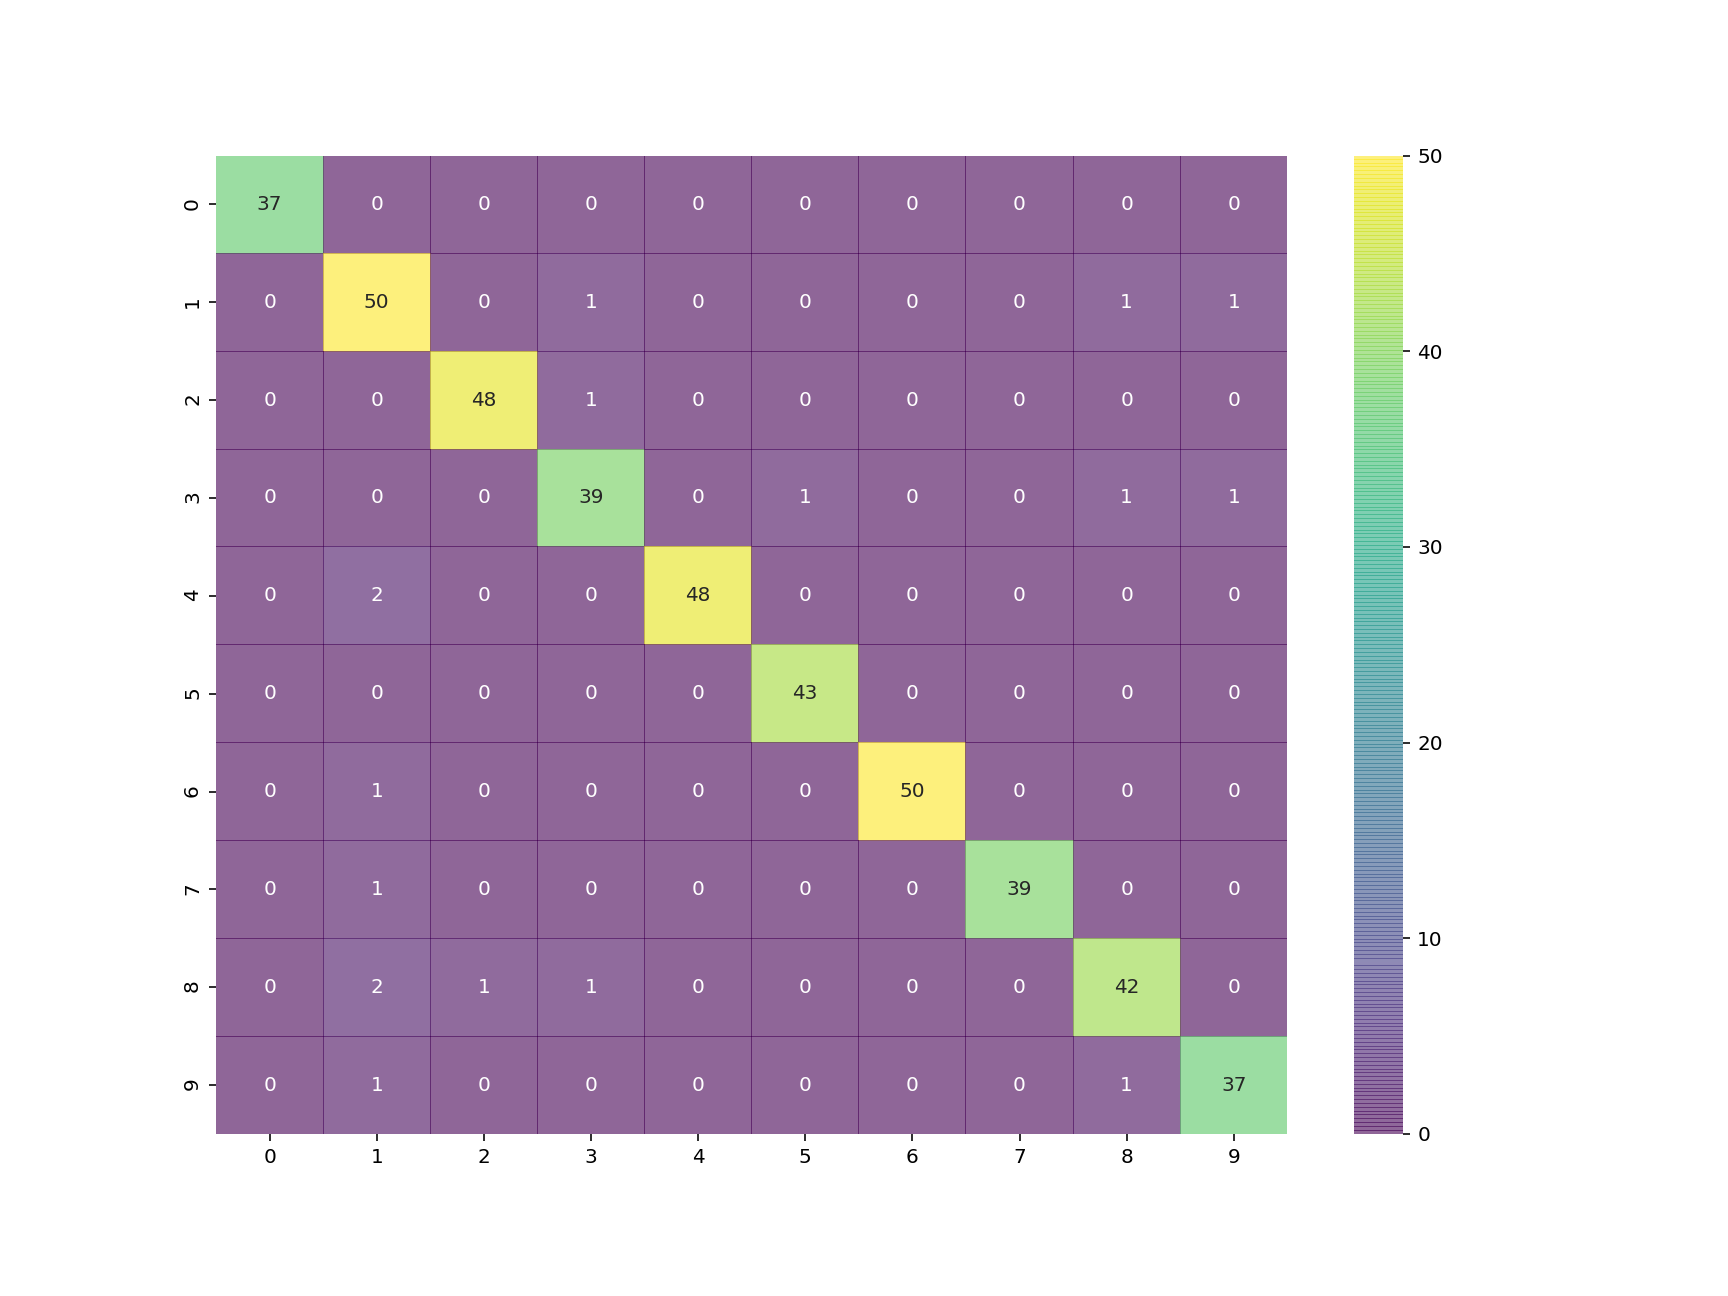

In [103]:
lgr.fit(X_train, y_train)
lg_pred = lgr.predict(X_test)
mat = confusion_matrix(y_test, lg_pred)
plt.figure(figsize = (12, 9))
sns.heatmap(mat, annot = True,fmt="d", cmap="viridis", alpha = 0.6)

In [100]:
print(classification_report(y_test, lg_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.88      0.94      0.91        53
          2       0.98      0.98      0.98        49
          3       0.93      0.93      0.93        42
          4       1.00      0.96      0.98        50
          5       0.98      1.00      0.99        43
          6       1.00      0.98      0.99        51
          7       1.00      0.97      0.99        40
          8       0.93      0.91      0.92        46
          9       0.95      0.95      0.95        39

avg / total       0.96      0.96      0.96       450



### Cross-Validation and Grid Search